## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
#Fazendo a leitura da base baixada, já que foi desabilitada do sklearn por motivos de racismo
df = pd.read_csv('BostonHousing.csv')
df = df.drop('b', axis = 1) # Removendo colunas de não interesse (devido ao racismo)
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [7]:
# Removendo a coluna target para deixar o x apenas com as variáveis explicativas
x = df.drop('medv', axis=1)
x.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98


In [8]:
# Copiando a coluna target para guardar apenas os resultados na variável y
y = df['medv']
y.head(3)

0    24.0
1    21.6
2    34.7
Name: medv, dtype: float64

In [9]:
# Dividindo a proporção de dados para treino e teste, o train_test_split já pega na proporção de 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [10]:
# Declarando as duas arvores e suas respectivas profundidades através do max_depth
tree1 = DecisionTreeRegressor(max_depth = 8)
tree2 = DecisionTreeRegressor(max_depth = 2)

# Treinando as duas arvores com os dados de treino
tree1.fit(x_train, y_train)
tree2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [17]:
# Calculando o CCP para a arvore de profundidade 8
path1 = tree1.cost_complexity_pruning_path(x_train, y_train)
path1

{'ccp_alphas': array([0.00000000e+00, 4.79944434e-15, 1.31926121e-05, 5.27704485e-05,
        1.18733509e-04, 1.18733509e-04, 2.11081794e-04, 3.29815303e-04,
        8.44327177e-04, 8.61917326e-04, 1.27088830e-03, 1.31926121e-03,
        1.93931398e-03, 2.12840809e-03, 2.96833773e-03, 3.16622691e-03,
        3.37730871e-03, 3.81266491e-03, 3.82208820e-03, 4.07689408e-03,
        4.22603342e-03, 4.76253298e-03, 6.02022867e-03, 6.38522427e-03,
        7.39226033e-03, 8.18161829e-03, 9.28979771e-03, 1.05936675e-02,
        1.44098505e-02, 1.80606860e-02, 1.83955271e-02, 1.97363572e-02,
        1.99538259e-02, 2.21767810e-02, 2.25153914e-02, 2.38291557e-02,
        2.45735959e-02, 2.69349164e-02, 2.95690413e-02, 3.37902793e-02,
        3.44202194e-02, 3.53238955e-02, 3.54786550e-02, 4.03928467e-02,
        4.10651035e-02, 4.23967678e-02, 4.29228965e-02, 4.44075889e-02,
        5.38277422e-02, 5.42245676e-02, 5.58048778e-02, 5.89982410e-02,
        6.43546251e-02, 6.46785169e-02, 6.86279683

In [18]:
# Calculando o CCP para a arvore de profundidade 2
path2 = tree2.cost_complexity_pruning_path(x_train, y_train)
path2

{'ccp_alphas': array([ 0.        ,  5.35090073, 15.70828647, 40.1714542 ]),
 'impurities': array([25.47431722, 30.82521794, 46.53350441, 86.70495861])}

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [19]:
# Atribuindo os valores de alpha e as impurezas para as variáveis ccp_alphas e impurities respectivamente
ccp_alphas, impurities = path1.ccp_alphas, path1.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.799444336532603e-15, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.3192612137191168e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.2770448548802164e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00011873350923487049, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00011873350923502047, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00021108179419685846, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00032981530343007914, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0008443271767807596, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0008619173262977644, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0012708883025507657, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0013192612137200917, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0019393139841683016, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0021284080914692415, random_state=0),
 Deci

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [22]:
# Utilizando list comprehension para guardar todos valores de MSE de cada árvore 
# Observado que são os mesmos valores de impurities visto ao tirar o CCP
train_scores = [mean_squared_error(y_train, clf.predict(x_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(x_test)) for clf in clfs]

In [23]:
train_scores

[0.0,
 0.0,
 0.00017150395778364088,
 0.0008707124010554048,
 0.002216358839050122,
 0.0024538258575197798,
 0.00480870712401054,
 0.009696569920844313,
 0.024386543535620038,
 0.030367194371152144,
 0.04673394898856635,
 0.04934608619173257,
 0.07148548812664902,
 0.07749252418645555,
 0.11946745822339487,
 0.12564256016630684,
 0.13239717758055486,
 0.15739278004317578,
 0.1650275331528629,
 0.1731712698031959,
 0.17739730322447997,
 0.21323434305360425,
 0.293992449942318,
 0.31282065281537574,
 0.3345321743633089,
 0.35772698526920166,
 0.4268696225351898,
 0.4871059796989876,
 0.6314972348817997,
 0.8292082538540323,
 0.8292082538540323,
 0.9236245236001174,
 0.9435783494576372,
 1.0291786761318422,
 1.0291786761318422,
 1.1669076850297166,
 1.2398840325608134,
 1.2917435626525335,
 1.3192646080099906,
 1.501426822231342,
 1.6034455882691576,
 1.6381174220422445,
 1.6734413175838183,
 1.7849554727338572,
 1.866413422948404,
 1.866413422948404,
 1.866413422948404,
 1.99530102922222

In [24]:
test_scores

[16.676929133858273,
 16.676929133858273,
 16.664822834645673,
 16.638622047244095,
 16.586340769903764,
 16.57795494313211,
 16.586478565179355,
 16.632798009623798,
 16.65494015748032,
 16.75501014873141,
 16.79066894138233,
 16.788602012248468,
 16.672572440944883,
 16.641914085739288,
 16.46034899387577,
 16.4468532692711,
 16.54008161572779,
 16.54321967347057,
 16.536753740640744,
 16.480341220777152,
 16.482036321389575,
 16.446537235561024,
 16.306976199894294,
 16.30982931527868,
 16.358473234788736,
 16.341937801717872,
 16.262946763209293,
 16.10005812042059,
 16.012676724456696,
 15.886286547335978,
 15.886286547335978,
 15.744428622191077,
 15.742533937151705,
 15.496350870749293,
 15.496350870749293,
 15.951268352920575,
 16.022883781572354,
 16.42398587595341,
 16.44151904145058,
 16.48409663706329,
 16.332649834095655,
 16.083163490591723,
 16.08876606828356,
 15.96631848506039,
 15.881695533476426,
 15.881695533476426,
 15.881695533476426,
 15.602015066017492,
 14.9646

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

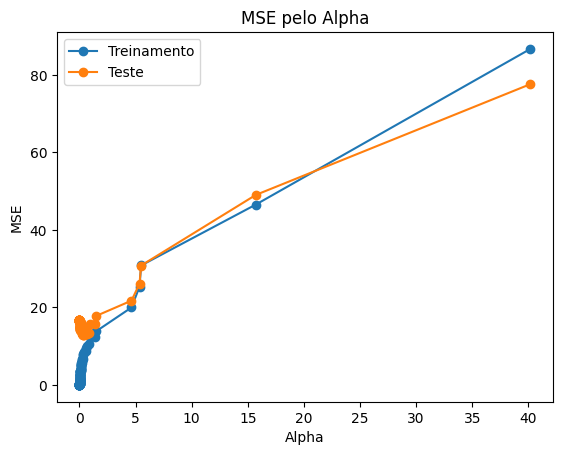

In [27]:
# Plot dos resultados
plt.figure()
plt.plot(ccp_alphas, train_scores, marker='o', label='Treinamento')
plt.plot(ccp_alphas, test_scores, marker='o', label='Teste')
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE pelo Alpha")
plt.legend()
plt.show()


In [31]:
# Indicando o MSE mínimo para obter o ponto ótimo
MSE_minimo = min(test_scores)
MSE_minimo

12.757370988453372

In [32]:
arvore_otima = DecisionTreeRegressor(random_state=0, ccp_alpha=12.757370988453372)
arvore_otima.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=12.757370988453372, random_state=0)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [33]:
print(f'R²: {arvore_otima.score(x_test, y_test)}')

R²: 0.6027876906129598


### 7. Visualize esta árvore.

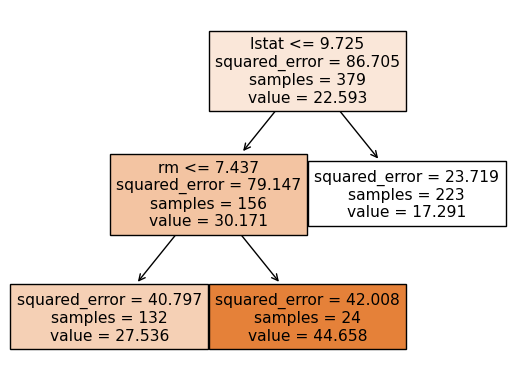

In [41]:
plot_arvore_otima = tree.plot_tree(arvore_otima, feature_names=x.columns, filled=True)

In [37]:
# Exportar a árvore em formato DOT
dot_data = tree.export_graphviz(arvore_otima, out_file=None, filled=True, rounded=True, 
                                feature_names=x_train.columns)

In [38]:
# Criar o objeto Graph a partir do DOT
graph = graphviz.Source(dot_data)

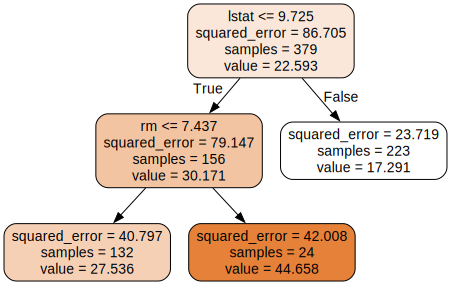

In [40]:
graph